# Understanding & Cleaning the Data

# <span style='background :khaki' > Install & Importa Libraries </span>

In [167]:
### ***Enviroment Preparation***
# Install Pandas
!pip install pandas
!pip install matplotlib
!pip install seaborn
'''!pip install scikit-learn'''

!pip install dtale

# Update pip -- WARNING Resolution
!python.exe -m pip install --upgrade pip

In [168]:
### ***Imports***
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
pylab.show()
import seaborn as sns

from datetime import datetime
from datetime import timedelta

'''from sklearn.ensemble import IsolationForest'''

import dtale
import os

# <span style='background :khaki' > Import all datafiles together </span>

#### <span style="background:skyblue"> Save all relevant file names <span>

In [169]:
folder_path = r'C:\Users\ghoyo\Desktop\TFM 3.0\JawsSpotifyData'

In [170]:
file_path_list = []

for filename in os.listdir(folder_path):
    if 'endsong_' in filename:
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            file_path_list.append(filename)
        
print(file_path_list)

['endsong_0.json', 'endsong_1.json', 'endsong_2.json', 'endsong_3.json', 'endsong_4.json', 'endsong_5.json', 'endsong_6.json']


#### <span style="background:skyblue"> Open Files as pandas dataframes and save them together in a list <span>

In [171]:
# Create an empty list to store the data frames
df_list = []

# Iterate over the file paths and read the files into pandas data frames
for file_path in file_path_list:
    df = pd.read_json(folder_path+'\\'+file_path)
    df_list.append(df)

In [172]:
df_list[0].head(2)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2017-04-08T03:34:25Z,javicalde,"Android OS 7.0 API 24 (samsung, SM-G935F)",149625,ES,37.10.166.26,unknown,Dominator,Armin van Buuren,Dominator,...,None,None,None,trackdone,trackdone,True,NaN,False,1491622313381,False
1,2018-07-16T10:19:32Z,javicalde,"iOS 11.4 (iPhone7,2)",8379,ES,193.152.35.79,unknown,Lo Siento,Kaydy Cain,Calle Amor,...,None,None,None,trackdone,fwdbtn,False,NaN,True,1531735184645,False


In [173]:
df_list[0].columns

Index(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')

#### <span style="background:skyblue"> Check if all df have the same columns -- check dfs are compatible <span>

In [174]:
columns_values = []

for a in df_list:
    columns_values.append(list(a.columns.values))
    
spot = len(columns_values) -1

reference = columns_values[0]
for check, i in zip(columns_values[1:], range(spot)):
    if check != reference:
        print('Dataframes do not have the same elements! - Failed at: ', i+1)
        
else:
    print('All Dataframes have the same elements')

All Dataframes have the same elements


#### <span style="background:skyblue"> Join Files, Delete Duplicates, Sort them by time stamp and Reset Index <span>

In [175]:
# Concatenate the data frames into a single data frame
df = pd.concat(df_list, ignore_index=True)

# Sort the data frame by a specific column
df = df.sort_values(by='ts')

# Size
a = df.shape
a

(106767, 21)

In [176]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Size
b = df.shape
b

(106745, 21)

In [177]:
# Difference of original and droped duplicates
a[0]-b[0]

22

In [178]:
# Sort the data for dropped values and reset index
df = df.sort_values(by='ts')
df.reset_index(inplace=True, drop=True)

# <span style='background :khaki' > Data Exploration </span>

### <span style="background:lightgreen"> Understand the data -- Data Inspection <span>

In [179]:
df.head(2)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2015-03-24T10:01:05Z,javicalde,"Android OS 5.0 API 21 (samsung, SM-G900F)",51641,ES,79.146.217.142,unknown,El Rito,Gondwana,Reggae N Roll,...,None,None,None,appload,appload,False,1.0,False,0,False
1,2015-03-24T10:01:39Z,javicalde,"Android OS 5.0 API 21 (samsung, SM-G900F)",35572,ES,79.146.217.142,unknown,Can't Stop Dancin' - A.C. Remix,Becky G,Can't Stop Dancin',...,None,None,None,appload,appload,False,1.0,False,0,False


In [180]:
# Null & No Null Value count, Tipe of variable 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106745 entries, 0 to 106744
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 106745 non-null  object 
 1   username                           106745 non-null  object 
 2   platform                           106745 non-null  object 
 3   ms_played                          106745 non-null  int64  
 4   conn_country                       106745 non-null  object 
 5   ip_addr_decrypted                  106745 non-null  object 
 6   user_agent_decrypted               106181 non-null  object 
 7   master_metadata_track_name         106611 non-null  object 
 8   master_metadata_album_artist_name  106611 non-null  object 
 9   master_metadata_album_album_name   106611 non-null  object 
 10  spotify_track_uri                  106611 non-null  object 
 11  episode_name                       129 

In [181]:
# Count, mean, std, min, max and percentiles
df.describe()

,ms_played,skipped,offline_timestamp
count,1.067450e+05,7113.000000,1.067450e+05
mean,1.464133e+05,0.472375,1.432552e+12
std,1.299455e+05,0.499271,4.563620e+11
min,0.000000e+00,0.000000,0.000000e+00
25%,1.989600e+04,0.000000,1.527582e+12
50%,1.618660e+05,0.000000,1.571566e+12
75%,2.141260e+05,1.000000,1.602674e+12
max,1.084291e+07,1.000000,1.669329e+12


# <span style='background :khaki' >  Cleaning the data <span>

In [182]:
df.sort_values('ts').head(2)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2015-03-24T10:01:05Z,javicalde,"Android OS 5.0 API 21 (samsung, SM-G900F)",51641,ES,79.146.217.142,unknown,El Rito,Gondwana,Reggae N Roll,...,None,None,None,appload,appload,False,1.0,False,0,False
1,2015-03-24T10:01:39Z,javicalde,"Android OS 5.0 API 21 (samsung, SM-G900F)",35572,ES,79.146.217.142,unknown,Can't Stop Dancin' - A.C. Remix,Becky G,Can't Stop Dancin',...,None,None,None,appload,appload,False,1.0,False,0,False


In [183]:
df.sort_values('ts').tail(2)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
106743,2022-11-24T22:22:38Z,javicalde,"Android OS 12 API 31 (samsung, SM-N770F)",122377,ES,176.83.43.164,unknown,mwah :3,rusowsky,mwah :3,...,None,None,None,clickrow,trackdone,False,NaN,False,1669328437849,False
106744,2022-11-24T22:27:00Z,javicalde,"Android OS 12 API 31 (samsung, SM-N770F)",267576,ES,176.83.43.164,unknown,Tangos De Copera,La Plazuela,Tangos De Copera,...,None,None,None,trackdone,trackdone,False,NaN,False,1669328554221,False


We cant drop nan values because some columns that are conected to others -- Song info (3 cols) and Podcast info (3 cols)

Because of this, we are going first to join them in only one grop of 3 columns

### <span style="background:lightgreen"> Join Podcast and Songs Columns </span>

In [184]:
# Get Podcast Index List
podcast_index = df['episode_name'].dropna().to_frame().index
#podcast_index

df['is_song'] = 1
df['is_podcast'] = 0

for i in podcast_index:
    df.loc[i, 'is_song'] = 0
    df.loc[i, 'is_podcast'] = 1
    df.loc[i, 'master_metadata_track_name'] = df.loc[i, 'episode_name']
    df.loc[i, 'master_metadata_album_artist_name'] = df.loc[i, 'episode_show_name']
    df.loc[i, 'master_metadata_album_album_name'] = df.loc[i, 'episode_show_name']
    df.loc[i, 'spotify_track_uri'] = df.loc[i, 'spotify_episode_uri']

### <span style="background:lightgreen"> Delete Columns with too many nan values -- 5% Criteria </span>

In [185]:
### ***Data has importance if > 5% != Nan ***
thresh = (df.shape[0]*5)/100
#print(thresh)

### ***Check What columns are useless - too many null values***
column_header = list(df.columns.values)
for c in column_header:
    if (df[c].notna().sum() < thresh):
        print('Dropping column', c, '--Too many NaN Values')
        df.drop(c, inplace=True, axis=1)

df.info()
thresh

Dropping column episode_name --Too many NaN Values
Dropping column episode_show_name --Too many NaN Values
Dropping column spotify_episode_uri --Too many NaN Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106745 entries, 0 to 106744
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 106745 non-null  object 
 1   username                           106745 non-null  object 
 2   platform                           106745 non-null  object 
 3   ms_played                          106745 non-null  int64  
 4   conn_country                       106745 non-null  object 
 5   ip_addr_decrypted                  106745 non-null  object 
 6   user_agent_decrypted               106181 non-null  object 
 7   master_metadata_track_name         106740 non-null  object 
 8   master_metadata_album_artist_name  106740 non-null  object 
 9   mast

5337.25

### <span style="background:lightgreen"> Treatin Columns and Dropping Useless ones </span>

In [186]:
### Imporant Values By Unique Values
# Get new Column Name Values
column_names = df.columns.values

# Threshold for values evaluation 0,5% ***
th_2 = (df.shape[0]*0.05)/100

# Save
unique_values_count = []
for i in range(len(df.nunique())):
    if(df.nunique()[i] < th_2):
        unique_values_count.append(df[column_names[i]].value_counts())

#### <span style="background:skyblue"> Get Columns Info for a better evaluation </span>

In [187]:
for u in unique_values_count:
    print(u)
    print('\n')

javicalde    106745
Name: username, dtype: int64


Android-tablet OS 10 API 29 (Xiaomi, Mi A3)                                                      15547
Android OS 11 API 30 (samsung, SM-N770F)                                                         12842
Android OS 9 API 28 (Xiaomi, Mi A3)                                                               9411
Android OS 12 API 31 (samsung, SM-N770F)                                                          7546
Android-tablet OS 7.0 API 24 (samsung, SM-G935F)                                                  6149
iOS 12.1.4 (iPhone7,2)                                                                            4980
iOS 12.1 (iPhone7,2)                                                                              4617
Android-tablet OS 9 API 28 (Xiaomi, Mi A3)                                                        4477
iOS 11.4.1 (iPhone7,2)                                                                            4238
Android OS 7.0 API 24 

#### <span style="background:skyblue"> Drop Useless Columns </span>

In [188]:
# skipped - Incomplete Information
df.drop('skipped', inplace=True, axis=1)
# Username seams unecessary - only one value
df.drop('username', inplace=True, axis=1)

In [189]:
# conn_country seams irrelevant - 1 week time travel - 93 sonsgs = 0,2% total 
df.drop('conn_country', inplace=True, axis=1)

In [190]:
# ip_addr_decrypted is irrelevant
df.drop('ip_addr_decrypted', inplace=True, axis=1)

In [191]:
# user_agent_decrypted - only 50 results the other are unknown = NaN - useless
df.drop('user_agent_decrypted', inplace=True, axis=1)

In [192]:
# Last 4 columns are useless for our propourse
df.drop('shuffle', inplace=True, axis=1)
df.drop('offline', inplace=True, axis=1)
df.drop('offline_timestamp', inplace=True, axis=1)
df.drop('incognito_mode', inplace=True, axis=1)

#### <span style="background:skyblue"> Other Drop Info Criteria -- Search link spotify only tearts 30s or longer listened </span>

In [193]:
# Replace songs that were listened less than 12s
ix = df.loc[df['ms_played'] <= 12000].index
df = df.drop(labels=ix, axis=0)

#### <span style="background:skyblue"> Reset Index after Operations </span>

In [194]:
# Reset index after operations
df = df.sort_values('ts')
df.reset_index(inplace=True, drop=True)
df.head(3)

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,is_song,is_podcast
0,2015-03-24T10:01:05Z,"Android OS 5.0 API 21 (samsung, SM-G900F)",51641,El Rito,Gondwana,Reggae N Roll,spotify:track:1MCWWh9fTfr4Ba2hdNHbkI,appload,appload,1,0
1,2015-03-24T10:01:39Z,"Android OS 5.0 API 21 (samsung, SM-G900F)",35572,Can't Stop Dancin' - A.C. Remix,Becky G,Can't Stop Dancin',spotify:track:798lmMNZ8Z9bfq2Ygsu5Pf,appload,appload,1,0
2,2015-03-24T10:02:19Z,"Android OS 5.0 API 21 (samsung, SM-G900F)",40495,Mal De Amores,Juan Magán,Mal De Amores,spotify:track:3qblRaS6LNQlfr2iFdisRh,appload,fwdbtn,1,0


#### <span style="background:skyblue"> Transform Usefull Columns </span>

In [195]:
# Platform - Split into Categories:
#Phone = 'iOS' / 'Android'
#Computer = 'windows' / 'web' / 'linux' / 'mac'
#Devise = 'Amazon' / 'tv' / 'Partner' /

df['platform'] = df['platform'].apply(lambda x : 'Phone' if ('iOS' in x or
                                                               'Android' in x)
                                      else(
                                      'Computer' if ('Windows' in x or
                                                    'web' in x)
                                          else(
                                          'Devise' if ('Amazon' in x or
                                                      'tv' in x or
                                                      'Partner' in x)
                                              else('other')
                                          )))

In [196]:
df['platform'].unique()

array(['Phone', 'Devise', 'Computer'], dtype=object)

### <span style="background:lightgreen"> Handling missing or Nan Values <span>

In [197]:
df.isnull().sum()

ts                                   0
platform                             0
ms_played                            0
master_metadata_track_name           0
master_metadata_album_artist_name    0
master_metadata_album_album_name     0
spotify_track_uri                    0
reason_start                         0
reason_end                           0
is_song                              0
is_podcast                           0
dtype: int64

In [198]:
# Only Remove Important Nan Values
df.dropna(subset = ["master_metadata_track_name"], inplace=True)

In [199]:
df.isnull().sum()

ts                                   0
platform                             0
ms_played                            0
master_metadata_track_name           0
master_metadata_album_artist_name    0
master_metadata_album_album_name     0
spotify_track_uri                    0
reason_start                         0
reason_end                           0
is_song                              0
is_podcast                           0
dtype: int64

In [200]:
# Reset index after operations
df = df.sort_values('ts')
df.reset_index(inplace=True, drop=True)
df.head(3)

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,is_song,is_podcast
0,2015-03-24T10:01:05Z,Phone,51641,El Rito,Gondwana,Reggae N Roll,spotify:track:1MCWWh9fTfr4Ba2hdNHbkI,appload,appload,1,0
1,2015-03-24T10:01:39Z,Phone,35572,Can't Stop Dancin' - A.C. Remix,Becky G,Can't Stop Dancin',spotify:track:798lmMNZ8Z9bfq2Ygsu5Pf,appload,appload,1,0
2,2015-03-24T10:02:19Z,Phone,40495,Mal De Amores,Juan Magán,Mal De Amores,spotify:track:3qblRaS6LNQlfr2iFdisRh,appload,fwdbtn,1,0


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82740 entries, 0 to 82739
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ts                                 82740 non-null  object
 1   platform                           82740 non-null  object
 2   ms_played                          82740 non-null  int64 
 3   master_metadata_track_name         82740 non-null  object
 4   master_metadata_album_artist_name  82740 non-null  object
 5   master_metadata_album_album_name   82740 non-null  object
 6   spotify_track_uri                  82740 non-null  object
 7   reason_start                       82740 non-null  object
 8   reason_end                         82740 non-null  object
 9   is_song                            82740 non-null  int64 
 10  is_podcast                         82740 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 6.9+ MB


In [202]:
df.shape

(82740, 11)

In [203]:
df.sort_values('ts').head(2)

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,is_song,is_podcast
0,2015-03-24T10:01:05Z,Phone,51641,El Rito,Gondwana,Reggae N Roll,spotify:track:1MCWWh9fTfr4Ba2hdNHbkI,appload,appload,1,0
1,2015-03-24T10:01:39Z,Phone,35572,Can't Stop Dancin' - A.C. Remix,Becky G,Can't Stop Dancin',spotify:track:798lmMNZ8Z9bfq2Ygsu5Pf,appload,appload,1,0


In [204]:
df.sort_values('ts').tail(2)

,ts,platform,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,is_song,is_podcast
82738,2022-11-24T22:22:38Z,Phone,122377,mwah :3,rusowsky,mwah :3,spotify:track:3PIECzRdxCWyAz6Poe4Rcp,clickrow,trackdone,1,0
82739,2022-11-24T22:27:00Z,Phone,267576,Tangos De Copera,La Plazuela,Tangos De Copera,spotify:track:4b6lJbPHnWpueU3ek8rUJP,trackdone,trackdone,1,0


# <span style="background:Red">  WEB SCRAPING DATAFRAME... Not Needed Right Now <span>

# <span style="background:Red">  WEB SCRAPING DATAFRAME... Not Needed Right Now <span>

# <span style='background :khaki' > Handeling Outlayers <span>

<AxesSubplot: >

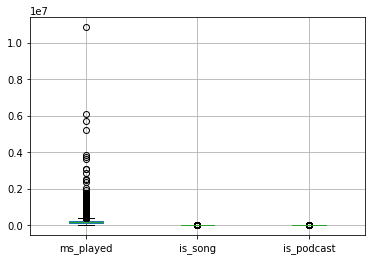

In [205]:
df.boxplot()

In [206]:
df.quantile(0.75)

C:\Users\ghoyo\AppData\Local\Temp\ipykernel_14012\3799946287.py:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



ms_played     230000.0
is_song            1.0
is_podcast         0.0
Name: 0.75, dtype: float64

# <span style='background :khaki' > Exploratory Data Analysis (EDA) <span>

In [207]:
df.corr()

C:\Users\ghoyo\AppData\Local\Temp\ipykernel_14012\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,ms_played,is_song,is_podcast
ms_played,1.000000,-0.275773,0.275773
is_song,-0.275773,1.000000,-1.000000
is_podcast,0.275773,-1.000000,1.000000


# <span style='background :khaki' > Preprocessing and Data Treatment <span>

### <span style="background:lightgreen"> Treating Time Data <span>

#### <span style="background:skyblue"> Already existing Data <span>

In [208]:
# Ts - To Datetime
df['end_streaming'] = df['ts'].apply(lambda x : x.replace('T', ' ').rstrip('Z'))
df['end_streaming'] = df['end_streaming'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df.drop('ts', inplace=True, axis=1)

In [209]:
# Miliseconds to Seconds
df['s_played'] = df['ms_played'].apply(lambda x : round(x/1000))
df.drop('ms_played', inplace=True, axis=1)

#### <span style="background:skyblue"> New Features -- DeltaTime <span>

In [210]:
# End Streaming in Seconds
epoch_time = datetime(1970, 1, 1)
df['end_streaming_seconds'] = df['end_streaming'].apply(lambda x : (x - epoch_time).total_seconds())

# Start Streaming in Seconds
for a in range(df.shape[0]):
    df.loc[a, 'start_streaming_seconds'] = df.loc[a, 'end_streaming_seconds'] - df.loc[a, 's_played']

# Start streaming
df['start_streaming'] = df['start_streaming_seconds'].apply(lambda x : (timedelta(seconds=x) + epoch_time))

In [211]:
### Delta Time between streamings
for a in range(df.shape[0]):
    if a != 0:
        df.loc[a, 'delta_time'] = df.loc[a, 'start_streaming_seconds'] - df.loc[a-1, 'end_streaming_seconds']
    else:
        df.loc[a, 'delta_time'] = 0.0

### <span style="background:lightgreen">  Variance of New Column - Delta Time <span>

In [212]:
df['delta_time'].describe()

count    8.274000e+04
mean     2.738313e+03
std      1.058757e+05
min     -1.438000e+03
25%     -7.000000e+00
50%     -1.000000e+00
75%      1.700000e+01
max      2.247209e+07
Name: delta_time, dtype: float64

In [213]:
df['delta_time'].value_counts()

 0.0        7419
-5.0        6465
-8.0        6056
 1.0        4762
-1.0        4554
            ... 
 8266.0        1
 4209.0        1
 7652.0        1
 5141.0        1
 50619.0       1
Name: delta_time, Length: 9796, dtype: int64

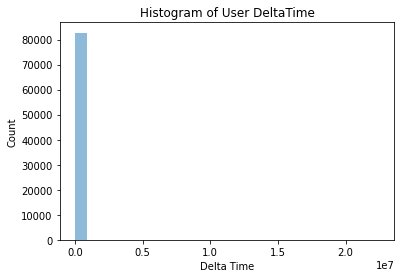

In [214]:
# set the histogram
plt.hist(df.delta_time, 
         range=(df.delta_time.min(),
                df.delta_time.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel('Delta Time') 
plt.ylabel('Count') 
plt.title('Histogram of User DeltaTime') 
plt.show()



In [215]:
varo = df['delta_time'].var()
print('var = ', varo)
df[df['delta_time'] == 0].shape

var =  11209664733.606112


(7419, 15)

In [216]:
a = df[(df['delta_time'] > 900) & (df['delta_time'] < 86400)]
print('var = ', a['delta_time'].var())
a.shape

var =  273686380.5302307


(10758, 15)

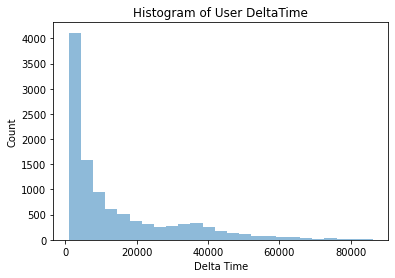

In [217]:
# set the histogram
plt.hist(a.delta_time, 
         range=(a.delta_time.min(),
                a.delta_time.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel('Delta Time') 
plt.ylabel('Count') 
plt.title('Histogram of User DeltaTime') 
plt.show()

# <span style='background :khaki' > Dealing with Erratic Data generated by transformation with original Data <span>

In [218]:
len(df.loc[df['delta_time'] < 0, 'delta_time']) 

41907

In [219]:
df.loc[df['delta_time'] < 0, 'delta_time'].unique()

array([-2.000e+00, -1.000e+00, -5.000e+00, -1.100e+01, -1.000e+01,
       -6.000e+00, -2.200e+01, -2.400e+01, -1.720e+02, -2.110e+02,
       -1.800e+02, -2.060e+02, -3.600e+01, -1.440e+02, -1.100e+02,
       -1.420e+02, -2.300e+01, -3.330e+02, -7.400e+01, -1.570e+02,
       -2.000e+02, -2.100e+01, -3.000e+00, -5.700e+01, -4.000e+01,
       -4.000e+00, -1.340e+02, -1.750e+02, -1.650e+02, -1.180e+02,
       -1.530e+02, -1.520e+02, -1.590e+02, -1.820e+02, -9.000e+00,
       -1.160e+02, -5.500e+01, -2.700e+01, -2.130e+02, -4.400e+01,
       -1.460e+02, -1.700e+01, -2.000e+01, -3.300e+01, -1.200e+01,
       -1.400e+01, -1.930e+02, -5.600e+01, -8.000e+00, -1.300e+01,
       -3.400e+01, -1.490e+02, -2.800e+01, -2.530e+02, -1.500e+01,
       -1.960e+02, -1.730e+02, -2.080e+02, -2.020e+02, -2.950e+02,
       -2.120e+02, -1.890e+02, -2.480e+02, -2.260e+02, -2.340e+02,
       -2.280e+02, -2.170e+02, -2.200e+02, -2.900e+02, -2.030e+02,
       -2.240e+02, -8.200e+01, -2.310e+02, -3.310e+02, -3.250e

In [220]:
df.loc[65566:65570, ['end_streaming', 's_played', 'start_streaming', 'delta_time', 'reason_start', 'reason_end']]

,end_streaming,s_played,start_streaming,delta_time,reason_start,reason_end
65566,2021-04-28 14:55:39,122,2021-04-28 14:53:37,0.0,trackdone,trackdone
65567,2021-04-28 14:58:52,193,2021-04-28 14:55:39,0.0,trackdone,trackdone
65568,2021-04-28 14:59:20,1466,2021-04-28 14:34:54,-1438.0,trackdone,remote
65569,2021-04-28 15:03:07,254,2021-04-28 14:58:53,-27.0,trackdone,trackdone
65570,2021-04-28 15:06:22,195,2021-04-28 15:03:07,0.0,trackdone,trackdone


#### <span style="background:skyblue"> We threat this erratic data as they are 0 <span>

In [221]:
df.loc[df['delta_time'] < 0, 'delta_time'] = 0.0

#### <span style="background:skyblue"> Check again Variance of Delta Time <span>

In [222]:
df['delta_time'].describe()

count    8.274000e+04
mean     2.751722e+03
std      1.058753e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.700000e+01
max      2.247209e+07
Name: delta_time, dtype: float64

In [223]:
df['delta_time'].value_counts()

0.0        49326
1.0         4762
2.0         1314
3.0          787
4.0          688
           ...  
5231.0         1
7224.0         1
4026.0         1
20610.0        1
50619.0        1
Name: delta_time, Length: 9315, dtype: int64

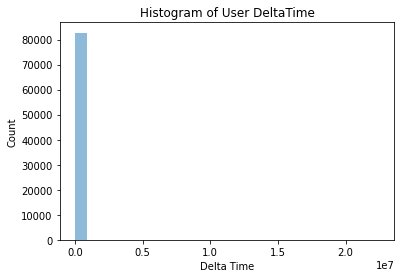

In [224]:
# set the histogram
plt.hist(df.delta_time, 
         range=(df.delta_time.min(),
                df.delta_time.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel('Delta Time') 
plt.ylabel('Count') 
plt.title('Histogram of User DeltaTime') 
plt.show()

In [225]:
varo = df['delta_time'].var()
print('var = ', varo)
df[df['delta_time'] == 0].shape

var =  11209588488.026844


(49326, 15)

In [226]:
a = df[(df['delta_time'] > 900) & (df['delta_time'] < 86400)]
print('var = ', a['delta_time'].var())
a.shape

var =  273686380.5302307


(10758, 15)

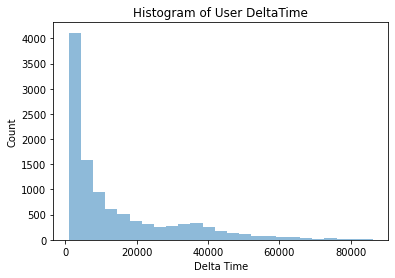

In [227]:
# set the histogram
plt.hist(a.delta_time, 
         range=(a.delta_time.min(),
                a.delta_time.max()+1), 
         bins=25, 
         alpha=0.5) 
# set title and labels
plt.xlabel('Delta Time') 
plt.ylabel('Count') 
plt.title('Histogram of User DeltaTime') 
plt.show()

### <span style='background :yellow' > Generar Prueba -- saltar canciones, cerrar loco spotify... <span>

# <span style="background:Beige"> Time Features <span>

#### <span style="background:skyblue"> Functions <span>

In [228]:
import datetime
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [(3, (datetime.date(Y,  1,  1),  datetime.date(Y,  3, 20))),
           (0, (datetime.date(Y,  3, 21),  datetime.date(Y,  6, 20))),
           (1, (datetime.date(Y,  6, 21),  datetime.date(Y,  9, 22))),
           (2, (datetime.date(Y,  9, 23),  datetime.date(Y, 12, 20))),
           (3, (datetime.date(Y, 12, 21),  datetime.date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, type(now)):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

def time_to_seconds(now):
    return ((now.hour*60 + now.minute)*60 + now.second)

#### <span style="background:skyblue"> Time Features <span>

In [229]:
### Day Features
# Create New Usefull Columns
df['year'] = df['end_streaming'].apply(lambda x : x.year)
df['seasson'] = df['end_streaming'].apply(lambda x : get_season(x))
df['month'] = df['end_streaming'].apply(lambda x : x.month)
df['month_and_year'] = df['end_streaming'].apply(lambda x : (x.year, x.month))
df['month_and_year'] = df['month_and_year'].apply(lambda x: '-'.join(map(str, x)))
df['week'] = df['end_streaming'].apply(lambda x : x.week)
df['week_and_year'] = df['end_streaming'].apply(lambda x : (x.year, x.week))
df['week_and_year'] = df['week_and_year'].apply(lambda x: '-'.join(map(str, x)))
df['day'] = df['end_streaming'].apply(lambda x : x.day)
df['days_to_next_month'] = df['end_streaming'].apply(lambda x : x.days_in_month-x.day)
df['date'] = df['end_streaming'].apply(lambda x : x.date())
df['hour'] = df['end_streaming'].apply(lambda x : x.hour)
df['minute'] = df['end_streaming'].apply(lambda x : x.minute)
df['second'] = df['end_streaming'].apply(lambda x : x.second)
df['time'] = df['end_streaming'].apply(lambda x: x.time())
df['str_time'] = df['time'].apply(lambda x: x.strftime('%H:%M:%S'))
df['time_in_s'] = df['time'].apply(lambda x : time_to_seconds(x))

# Week Days treat as a circle, 0 = Monday is closer to 6 = Sunday than to 3 = Thursday
df['week_day'] = df['end_streaming'].apply(lambda x : x.weekday())

<span style="background:yellow"> About Circular data and about cyclical data ... Cordenadas Circulares </span>


#df['week_day_sin'] = df['week_day'].apply(lambda x: np.sin(x*(2 * np.pi / 7)))

#df['week_day_cos'] = df['week_day'].apply(lambda x: np.cos(x*(2 * np.pi / 7)))

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82740 entries, 0 to 82739
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   platform                           82740 non-null  object        
 1   master_metadata_track_name         82740 non-null  object        
 2   master_metadata_album_artist_name  82740 non-null  object        
 3   master_metadata_album_album_name   82740 non-null  object        
 4   spotify_track_uri                  82740 non-null  object        
 5   reason_start                       82740 non-null  object        
 6   reason_end                         82740 non-null  object        
 7   is_song                            82740 non-null  int64         
 8   is_podcast                         82740 non-null  int64         
 9   end_streaming                      82740 non-null  datetime64[ns]
 10  s_played                          

#### <span style="background:skyblue"> Solving anomalies problems <span>

# <span style="background:yellow"> Studing Delta time we get to know there are No streaming periods really high -- 8 months </span>

Explain about why, what to do and what makes sense

Estar un mes o mas tiempo sin escuchar musica es raro. Principalmente porque los tiempos de consumo son muy pequeños, y la gente joven suele escuchar musica. Secundariamente porque tienes un servicio contratado que tiene un precio mensual o anuam por el que pagas. 

Resultado: Puede ser una manera interesante de hacerle saber al usuario que no esta aprovechando el servicio y se des-suscriba o de mandarle una notificiacion recordandole que se puede activar y aprovechar sus ventajas.

También es un metodo útil de saber si el usuario se ha des-suscrito y luego ha vuelto.

<span style='background :yellow' > Este es muy interesante para entender el patron de cada cuanto, como, o porque se desactiva un usuario</span>

In [231]:
df[df['delta_time'] == 22472086.0]

,platform,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,is_song,is_podcast,end_streaming,...,day,days_to_next_month,date,hour,minute,second,time,str_time,time_in_s,week_day
56,Phone,Intro to Captain Jack - Live April 1972 At Sig...,Billy Joel,Piano Man (Legacy Edition),spotify:track:1nno3ZNMYJYNrp3hhVtyZ3,clickrow,endplay,1,0,2016-01-28 20:05:11,...,28,3,2016-01-28,20,5,11,20:05:11,20:05:11,72311,3


In [232]:
df.loc[54:58, ['end_streaming', 's_played', 'start_streaming', 'delta_time']]

,end_streaming,s_played,start_streaming,delta_time
54,2015-05-13 17:45:57,207,2015-05-13 17:42:30,0.0
55,2015-05-13 17:50:09,251,2015-05-13 17:45:58,1.0
56,2016-01-28 20:05:11,16,2016-01-28 20:04:55,22472086.0
57,2016-01-28 20:53:19,193,2016-01-28 20:50:06,2695.0
58,2016-01-29 06:10:46,27,2016-01-29 06:10:19,33420.0


<span style='background :yellow' > Create breaking point datasets </span>

In [233]:
month_in_secs = 2628002

In [234]:
df['df_fractured'] = 0
for a in df.index:
    if (df.loc[a, 'delta_time'] >= month_in_secs):
        df.loc[a, 'df_fractured'] = 1

In [235]:
a = df[df['df_fractured'] == 1]
a[['end_streaming', 'delta_time']]

,end_streaming,delta_time
22,2015-05-11 19:30:54,3524879.0
56,2016-01-28 20:05:11,22472086.0
75,2016-08-28 22:41:22,18263718.0
627,2016-10-18 21:00:00,3129837.0
697,2017-03-10 07:32:11,7067416.0


In [236]:
df.shape

(82740, 32)

#### <span style="background:skyblue"> Thinking to remove this data <span>

In [237]:
(700*100)/(df.shape[0])

0.8460236886632826

loosing 1% of data is axceptable, and will solve a lot of problems

#### <span style="background:skyblue"> Thinking to generate sparse data during this time <span>

In [238]:
d = []
b = a.index[0]

for c in a.index[1:]:
    d.append(c-b)
    b = c

print(d)
    
print('\n')
e = []
for c in a.index:
    e.append((df.loc[c, 'end_streaming'] - df.loc[c-1, 'end_streaming']).days)
    
print(e)
print('a total of: ', sum(e), 'sparse data will be added. %=', sum(e)*100/int(df.index[-1]))

[34, 19, 552, 70]


[40, 260, 211, 36, 81]
a total of:  628 sparse data will be added. %= 0.7590132827324478


<span style='background :yellow' > More or less we will have the same data sparse or loose, I think for a better analysis it is crutial to reemove, because this data, although it contains some evolution process, it is old data and less relevant </span>

# <span style='background :khaki' > Visualización de los Datos <span>

In [239]:
#sns.pairplot(df)

In [240]:
#sns.boxplot(x, y, data)

In [241]:
#sns.countplot(x, data)

### <span style="background:lightgreen"> Plot Data By Day <span>

In [242]:
#dfi = df.set_index('date', drop=False)
dfi = df.copy()

In [243]:
# Split by Days & Get Index
# ==================================================================================
all_days = dfi['date'].unique()
days_ix = [dfi.loc[dfi['date'] == d].index for d in all_days]
#days_ixº
songs_in_day = [len(days_ix[a]) for a in range(len(days_ix))]

In [244]:
print(np.mean(songs_in_day))
print(np.var(songs_in_day))
print()
print(songs_in_day)


39.99033349444176
801.2700853890232

[8, 7, 7, 7, 7, 20, 2, 2, 15, 22, 148, 32, 25, 29, 77, 20, 38, 39, 51, 12, 5, 35, 1, 18, 1, 1, 11, 10, 4, 8, 21, 14, 1, 3, 1, 10, 66, 123, 63, 45, 56, 36, 73, 18, 76, 49, 89, 22, 58, 25, 9, 54, 43, 33, 49, 19, 20, 13, 26, 21, 76, 41, 78, 5, 4, 21, 24, 26, 15, 48, 44, 35, 41, 83, 52, 67, 73, 110, 29, 129, 115, 62, 60, 32, 32, 56, 11, 65, 73, 63, 53, 45, 85, 49, 22, 67, 15, 24, 28, 20, 25, 29, 24, 33, 1, 11, 25, 35, 6, 28, 21, 59, 18, 80, 2, 28, 15, 7, 17, 33, 6, 87, 45, 6, 38, 61, 25, 50, 30, 18, 29, 74, 109, 12, 16, 6, 33, 43, 10, 82, 54, 77, 18, 20, 8, 5, 38, 28, 24, 10, 53, 38, 1, 64, 52, 35, 17, 144, 18, 14, 21, 32, 11, 87, 129, 142, 25, 51, 25, 57, 30, 84, 151, 112, 26, 24, 23, 35, 10, 64, 60, 46, 61, 37, 16, 33, 56, 38, 30, 27, 27, 20, 32, 34, 32, 39, 27, 25, 10, 37, 99, 41, 8, 38, 17, 36, 38, 64, 15, 13, 23, 9, 39, 28, 97, 25, 17, 16, 24, 82, 18, 76, 64, 25, 47, 36, 48, 39, 80, 130, 39, 37, 28, 42, 65, 66, 5, 7, 34, 35, 32, 65, 15, 8, 156, 86,

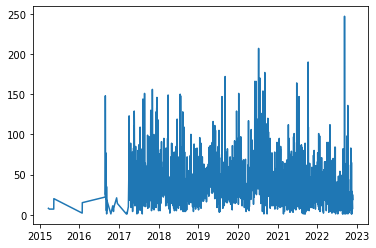

In [245]:
# Plot number of songs listened each day
plt.plot(all_days, songs_in_day)

#### <span style="background:skyblue"> Solving Unconsistency problem talked about too many time withouht litening <span>

In [246]:
for a in dfi['month_and_year'].unique():
    print(dfi[dfi['month_and_year'] == a].shape[0])

15
7
34
19
227
325
2
33
35
15
1039
1554
918
1102
1521
1107
1294
1445
1954
1198
1268
1601
947
1204
1003
1559
1222
825
1168
919
1163
1203
1201
1316
1546
1811
1394
885
1409
1290
1150
1269
1655
1708
1240
926
1245
1638
2188
2311
1959
1932
1458
994
988
1236
974
989
1064
1136
1285
1098
894
629
1088
882
1136
1192
870
1103
1165
792
698
571
619
755
649
476


In [247]:
dfi['month_and_year'].unique()

array(['2015-3', '2015-4', '2015-5', '2016-1', '2016-8', '2016-9',
       '2016-10', '2016-11', '2016-12', '2017-3', '2017-4', '2017-5',
       '2017-6', '2017-7', '2017-8', '2017-9', '2017-10', '2017-11',
       '2017-12', '2018-1', '2018-2', '2018-3', '2018-4', '2018-5',
       '2018-6', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11',
       '2018-12', '2019-1', '2019-2', '2019-3', '2019-4', '2019-5',
       '2019-6', '2019-7', '2019-8', '2019-9', '2019-10', '2019-11',
       '2019-12', '2020-1', '2020-2', '2020-3', '2020-4', '2020-5',
       '2020-6', '2020-7', '2020-8', '2020-9', '2020-10', '2020-11',
       '2020-12', '2021-1', '2021-2', '2021-3', '2021-4', '2021-5',
       '2021-6', '2021-7', '2021-8', '2021-9', '2021-10', '2021-11',
       '2021-12', '2022-1', '2022-2', '2022-3', '2022-4', '2022-5',
       '2022-6', '2022-7', '2022-8', '2022-9', '2022-10', '2022-11'],
      dtype=object)

In [248]:
for a, i in zip(dfi['month_and_year'].unique(), range(len(dfi['month_and_year'].unique()))):
    if(i < 9):
        dfi.drop(dfi.loc[dfi['month_and_year'] == a].index, inplace=True)
    

In [249]:
dfi['month_and_year'].unique()

array(['2017-3', '2017-4', '2017-5', '2017-6', '2017-7', '2017-8',
       '2017-9', '2017-10', '2017-11', '2017-12', '2018-1', '2018-2',
       '2018-3', '2018-4', '2018-5', '2018-6', '2018-7', '2018-8',
       '2018-9', '2018-10', '2018-11', '2018-12', '2019-1', '2019-2',
       '2019-3', '2019-4', '2019-5', '2019-6', '2019-7', '2019-8',
       '2019-9', '2019-10', '2019-11', '2019-12', '2020-1', '2020-2',
       '2020-3', '2020-4', '2020-5', '2020-6', '2020-7', '2020-8',
       '2020-9', '2020-10', '2020-11', '2020-12', '2021-1', '2021-2',
       '2021-3', '2021-4', '2021-5', '2021-6', '2021-7', '2021-8',
       '2021-9', '2021-10', '2021-11', '2021-12', '2022-1', '2022-2',
       '2022-3', '2022-4', '2022-5', '2022-6', '2022-7', '2022-8',
       '2022-9', '2022-10', '2022-11'], dtype=object)

In [250]:
dfi.reset_index(inplace=True, drop=True)

#### <span style="background:skyblue"> Plot Data By Day - Numbers <span>

In [251]:
# Split by Days & Get Index
# ==================================================================================
all_days = dfi['date'].unique()
days_ix = [dfi.loc[dfi['date'] == d].index for d in all_days]
#days_ixº
songs_in_day = [len(days_ix[a]) for a in range(len(days_ix))]

In [252]:
for i in days_ix[:4]:
    dfi.drop(i, inplace = True, axis = 0)
    
dfi.reset_index(inplace=True, drop=True)

In [253]:
df.loc[0,'delta_time'] = 0.0

In [254]:
# Split by Days & Get Index
# ==================================================================================
all_days = dfi['date'].unique()
days_ix = [dfi.loc[dfi['date'] == d].index for d in all_days]
#days_ixº
songs_in_day = [len(days_ix[a]) for a in range(len(days_ix))]

In [255]:
print(np.mean(songs_in_day))
print(np.var(songs_in_day))
print(songs_in_day)

40.348253812100346
795.1330232666172
[66, 123, 63, 45, 56, 36, 73, 18, 76, 49, 89, 22, 58, 25, 9, 54, 43, 33, 49, 19, 20, 13, 26, 21, 76, 41, 78, 5, 4, 21, 24, 26, 15, 48, 44, 35, 41, 83, 52, 67, 73, 110, 29, 129, 115, 62, 60, 32, 32, 56, 11, 65, 73, 63, 53, 45, 85, 49, 22, 67, 15, 24, 28, 20, 25, 29, 24, 33, 1, 11, 25, 35, 6, 28, 21, 59, 18, 80, 2, 28, 15, 7, 17, 33, 6, 87, 45, 6, 38, 61, 25, 50, 30, 18, 29, 74, 109, 12, 16, 6, 33, 43, 10, 82, 54, 77, 18, 20, 8, 5, 38, 28, 24, 10, 53, 38, 1, 64, 52, 35, 17, 144, 18, 14, 21, 32, 11, 87, 129, 142, 25, 51, 25, 57, 30, 84, 151, 112, 26, 24, 23, 35, 10, 64, 60, 46, 61, 37, 16, 33, 56, 38, 30, 27, 27, 20, 32, 34, 32, 39, 27, 25, 10, 37, 99, 41, 8, 38, 17, 36, 38, 64, 15, 13, 23, 9, 39, 28, 97, 25, 17, 16, 24, 82, 18, 76, 64, 25, 47, 36, 48, 39, 80, 130, 39, 37, 28, 42, 65, 66, 5, 7, 34, 35, 32, 65, 15, 8, 156, 86, 65, 100, 85, 44, 54, 40, 50, 58, 23, 27, 98, 22, 13, 6, 38, 14, 51, 63, 24, 39, 57, 70, 20, 22, 100, 93, 18, 40, 70, 34, 71, 9, 

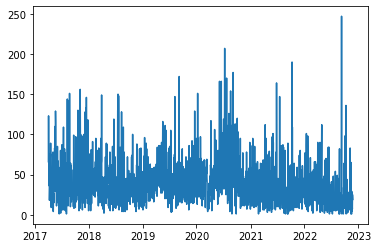

In [256]:
# Plot number of songs listened each day
plt.plot(all_days, songs_in_day)

#### <span style="background:skyblue"> Plot Data By Day - Delta Time <span>

<span style="background:violet"> 3 Days <span>

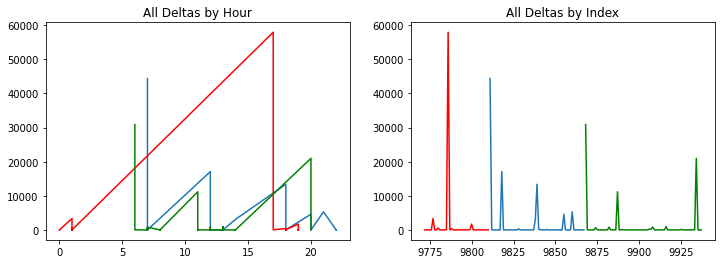

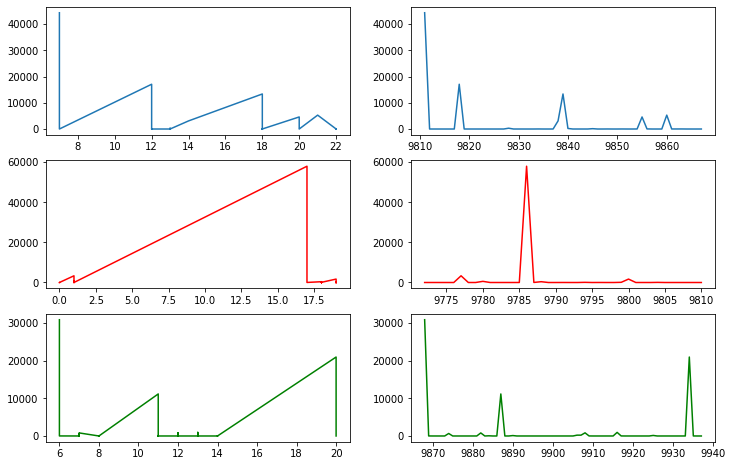

In [257]:
figure_0, axis_0 = plt.subplots(1, 2, figsize=(12, 4))
axis_0[0].plot(dfi.loc[days_ix[230], 'hour'], dfi.loc[days_ix[230], 'delta_time'], label='MaxDay')
axis_0[0].plot(dfi.loc[days_ix[229], 'hour'], dfi.loc[days_ix[229], 'delta_time'], label='Max-1', color='r')
axis_0[0].plot(dfi.loc[days_ix[231], 'hour'], dfi.loc[days_ix[231], 'delta_time'], label='Max+1', color='g')
axis_0[0].set_title("All Deltas by Hour")

axis_0[1].plot(dfi.loc[days_ix[230], 'delta_time'], label='MaxDay')
axis_0[1].plot(dfi.loc[days_ix[229], 'delta_time'], label='Max-1', color='r')
axis_0[1].plot(dfi.loc[days_ix[231], 'delta_time'], label='Max+1', color='g')
axis_0[1].set_title("All Deltas by Index")

plt.plot()


figure_1, axis_1 = plt.subplots(3, 2, figsize=(12, 8))
axis_1[0, 0].plot(dfi.loc[days_ix[230], 'hour'], dfi.loc[days_ix[230], 'delta_time'], label='MaxDay-Hour')
axis_1[1, 0].plot(dfi.loc[days_ix[229], 'hour'], dfi.loc[days_ix[229], 'delta_time'], label='Max-1-Hour', color='r')
axis_1[2, 0].plot(dfi.loc[days_ix[231], 'hour'], dfi.loc[days_ix[231], 'delta_time'], label='Max+1-Hour', color='g')

axis_1[0, 1].plot(dfi.loc[days_ix[230], 'delta_time'], label='MaxDay-Index')
axis_1[1, 1].plot(dfi.loc[days_ix[229], 'delta_time'], label='Max-1-Index', color='r')
axis_1[2, 1].plot(dfi.loc[days_ix[231], 'delta_time'], label='Max+1-Index', color='g')

#plt.plot()
pylab.show()


In [258]:
dfi.loc[days_ix[2], 'delta_time']

189    35335.0
190        6.0
191        0.0
192        3.0
193        0.0
        ...   
247       13.0
248      529.0
249        0.0
250        1.0
251        1.0
Name: delta_time, Length: 63, dtype: float64

In [259]:
dfi[['end_streaming', 'delta_time']].head(2)

,end_streaming,delta_time
0,2017-04-04 13:29:36,490066.0
1,2017-04-04 14:06:56,2041.0


<span style="background:violet"> All of them <span>

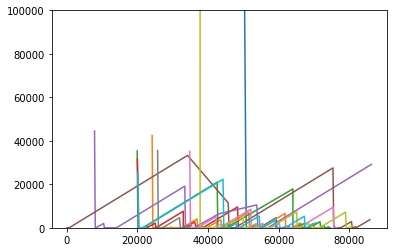

In [260]:
# Plot of delta time during the days

#for i in range(len(all_days)):
for i in range(10):
    #plt.ylim(0, 1100000)
    plt.ylim(0, 100000)
    plt.plot(dfi.loc[days_ix[i], 'time_in_s'], dfi.loc[days_ix[i], 'delta_time'])
    
pylab.show()

### <span style="background:lightgreen"> Plot Data By Month <span>

#### <span style="background:skyblue"> Plot Data By Month - Numbers <span>

In [261]:
# Split by Month
# ==================================================================================
all_months = dfi['month_and_year'].unique()
month_ix = [dfi.loc[dfi['month_and_year'] == m].index for m in all_months]
#month_ix
songs_in_month = [len(month_ix[a]) for a in range(len(month_ix))]

In [262]:
print(songs_in_month)

[1039, 1554, 918, 1102, 1521, 1107, 1294, 1445, 1954, 1198, 1268, 1601, 947, 1204, 1003, 1559, 1222, 825, 1168, 919, 1163, 1203, 1201, 1316, 1546, 1811, 1394, 885, 1409, 1290, 1150, 1269, 1655, 1708, 1240, 926, 1245, 1638, 2188, 2311, 1959, 1932, 1458, 994, 988, 1236, 974, 989, 1064, 1136, 1285, 1098, 894, 629, 1088, 882, 1136, 1192, 870, 1103, 1165, 792, 698, 571, 619, 755, 649, 476]


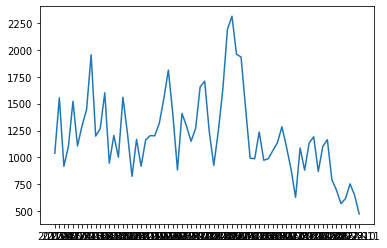

In [263]:
plt.plot(all_months, songs_in_month)

In [264]:
dfi[dfi['month_and_year'] == '2022-11']

,platform,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,is_song,is_podcast,end_streaming,...,days_to_next_month,date,hour,minute,second,time,str_time,time_in_s,week_day,df_fractured
81552,Phone,Robot Dreams,Natural Language,MASA 003,spotify:track:61DifHIcN8BsiT2s6E2BWN,appload,logout,1,0,2022-11-01 12:40:48,...,29,2022-11-01,12,40,48,12:40:48,12:40:48,45648,1,0
81553,Phone,Tweakers,Gloosito,Tweakers,spotify:track:3w1SQ3igMnsldOANBo5dqm,playbtn,trackdone,1,0,2022-11-01 12:43:21,...,29,2022-11-01,12,43,21,12:43:21,12:43:21,45801,1,0
81554,Phone,Me Gustaron Tus Nai,Soto Asa,Down Music,spotify:track:2LXUOXihEoNt7aYYu5XjZ6,playbtn,trackdone,1,0,2022-11-01 12:48:42,...,29,2022-11-01,12,48,42,12:48:42,12:48:42,46122,1,0
81555,Phone,New Barcelona,Holics,Holics Tape,spotify:track:2ZEXLSjvNqrhJ97PhW60tf,trackdone,trackdone,1,0,2022-11-01 12:50:31,...,29,2022-11-01,12,50,31,12:50:31,12:50:31,46231,1,0
81556,Phone,Talking Shit,Gloosito,Talking Shit,spotify:track:1qrZAt4QbKwA25aA9ipfTb,trackdone,trackdone,1,0,2022-11-01 12:51:46,...,29,2022-11-01,12,51,46,12:51:46,12:51:46,46306,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82023,Phone,mwah :3,rusowsky,mwah :3,spotify:track:3PIECzRdxCWyAz6Poe4Rcp,trackdone,trackdone,1,0,2022-11-24 22:13:20,...,6,2022-11-24,22,13,20,22:13:20,22:13:20,80000,3,0
82024,Phone,Tangos De Copera,La Plazuela,Tangos De Copera,spotify:track:4b6lJbPHnWpueU3ek8rUJP,trackdone,endplay,1,0,2022-11-24 22:15:38,...,6,2022-11-24,22,15,38,22:15:38,22:15:38,80138,3,0
82025,Phone,je suis,GAZZI,je suis,spotify:track:0VND0Hye2brqMEjQ7Pa8DG,clickrow,trackdone,1,0,2022-11-24 22:20:21,...,6,2022-11-24,22,20,21,22:20:21,22:20:21,80421,3,0
82026,Phone,mwah :3,rusowsky,mwah :3,spotify:track:3PIECzRdxCWyAz6Poe4Rcp,clickrow,trackdone,1,0,2022-11-24 22:22:38,...,6,2022-11-24,22,22,38,22:22:38,22:22:38,80558,3,0


#### <span style="background:skyblue"> Plot Data By Month - DeltaTime <span>

<span style="background:violet"> 3 Months <span>

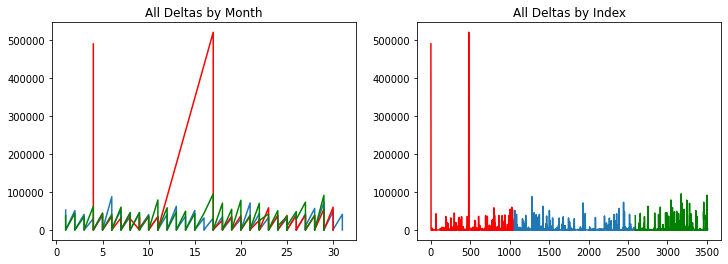

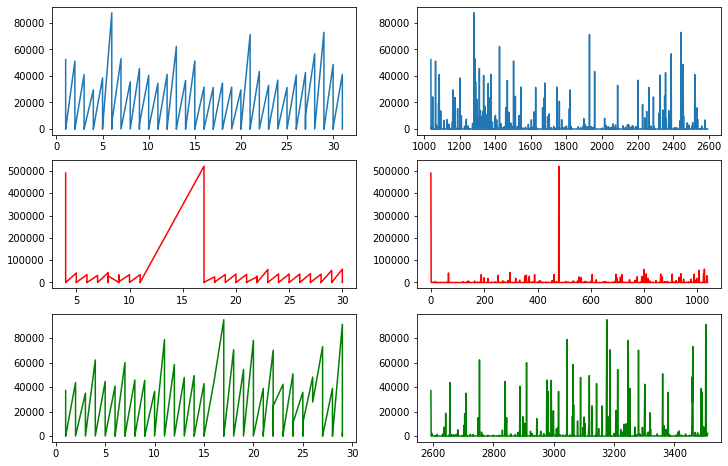

In [265]:
figure_0, axis_0 = plt.subplots(1, 2, figsize=(12, 4))
axis_0[0].plot(dfi.loc[month_ix[1], 'day'], dfi.loc[month_ix[1], 'delta_time'], label='MaxMonth')
axis_0[0].plot(dfi.loc[month_ix[0], 'day'], dfi.loc[month_ix[0], 'delta_time'], label='Max-1', color='r')
axis_0[0].plot(dfi.loc[month_ix[2], 'day'], dfi.loc[month_ix[2], 'delta_time'], label='Max+1', color='g')
axis_0[0].set_title("All Deltas by Month")

axis_0[1].plot(dfi.loc[month_ix[1], 'delta_time'], label='MaxMonth')
axis_0[1].plot(dfi.loc[month_ix[0], 'delta_time'], label='Max-1', color='r')
axis_0[1].plot(dfi.loc[month_ix[2], 'delta_time'], label='Max+1', color='g')
axis_0[1].set_title("All Deltas by Index")

plt.plot()

figure_1, axis_1 = plt.subplots(3, 2, figsize=(12, 8))
axis_1[0, 0].plot(dfi.loc[month_ix[1], 'day'], dfi.loc[month_ix[1], 'delta_time'], label='MaxMonth')
axis_1[0, 1].plot(dfi.loc[month_ix[1], 'delta_time'], label='MaxMonth')
axis_1[1, 0].plot(dfi.loc[month_ix[0], 'day'], dfi.loc[month_ix[0], 'delta_time'], label='Max-1', color='r')
axis_1[1, 1].plot(dfi.loc[month_ix[0], 'delta_time'], label='Max-1', color='r')
axis_1[2, 0].plot(dfi.loc[month_ix[2], 'day'], dfi.loc[month_ix[2], 'delta_time'], label='Max+1', color='g')
axis_1[2, 1].plot(dfi.loc[month_ix[2], 'delta_time'], label='Max+1', color='g')

#plt.plot()
pylab.show()

<span style="background:violet"> All Months - Split <span>

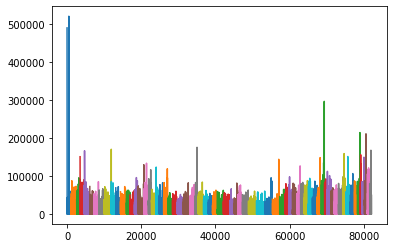

In [266]:
# Plot of delta time during the days
for i in range(len(all_months)):
    dfi.loc[month_ix[i], 'delta_time'].plot()
    
pylab.show()

In [267]:
max(dfi['delta_time'])

520748.0

<span style="background:violet"> All Months - Together <span>

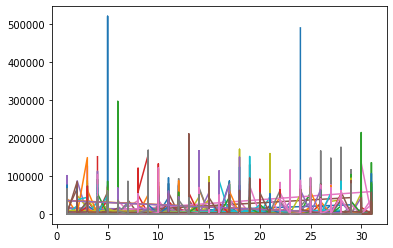

In [268]:
for i in range(len(all_months)):
#for i in range(6):
    plt.plot(df.loc[month_ix[i], 'day'], dfi.loc[month_ix[i], 'delta_time'])

pylab.show()

### <span style="background:lightgreen"> Plot Data By Year <span>

#### <span style="background:skyblue"> Plot Data By Year - Numbers <span>

In [269]:
# Split by Month
# ==================================================================================
all_y = dfi['year'].unique()
year_ix = [dfi.loc[df['year'] == y].index for y in all_y]
#year_ix
songs_in_y = [len(year_ix[a]) for a in range(len(year_ix))]

In [270]:
print(songs_in_y)

[11949, 14077, 16129, 18587, 12411, 8178]


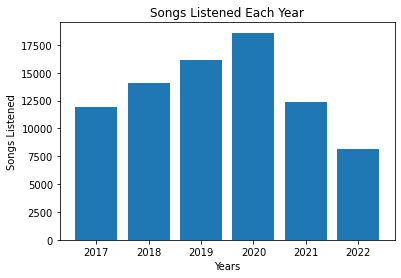

In [271]:
# Plot number of songs listened each month
plt.bar(list(all_y), songs_in_y)
plt.title('Songs Listened Each Year')
plt.xlabel('Years')
plt.ylabel('Songs Listened')
plt.show()

#### <span style="background:skyblue"> Plot Data By Year - DeltaTime <span>

<span style="background:violet"> 3 Years <span>

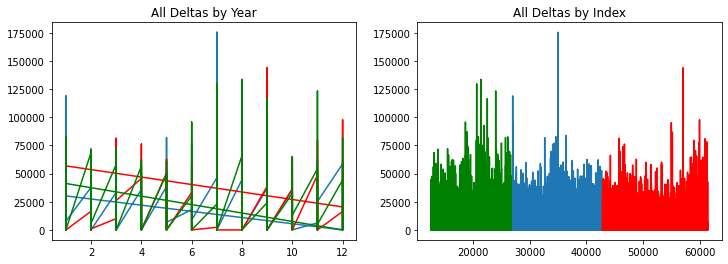

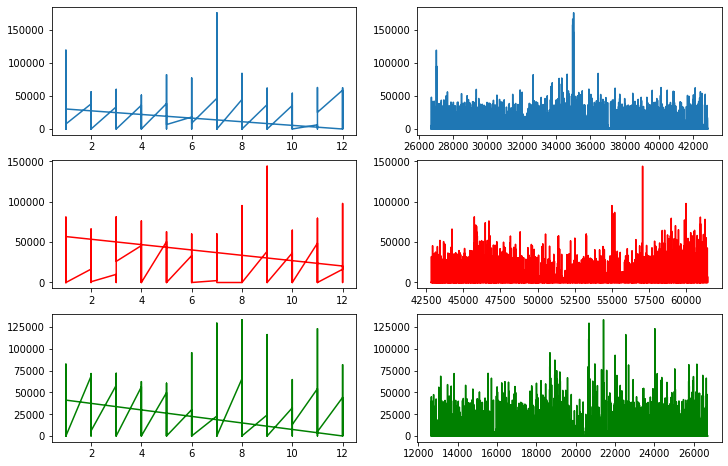

In [272]:
figure_0, axis_0 = plt.subplots(1, 2, figsize=(12, 4))
axis_0[0].plot(dfi.loc[year_ix[2], 'month'], dfi.loc[year_ix[2], 'delta_time'], label='MaxYear')
axis_0[0].plot(dfi.loc[year_ix[3], 'month'], dfi.loc[year_ix[3], 'delta_time'], label='Max+1', color='r')
axis_0[0].plot(dfi.loc[year_ix[1], 'month'], dfi.loc[year_ix[1], 'delta_time'], label='Max-1', color='g')

axis_0[0].set_title("All Deltas by Year")

axis_0[1].plot(dfi.loc[year_ix[2], 'delta_time'], label='MaxYear')
axis_0[1].plot(dfi.loc[year_ix[3], 'delta_time'], label='Max+1', color='r')
axis_0[1].plot(dfi.loc[year_ix[1], 'delta_time'], label='Max-1', color='g')
axis_0[1].set_title("All Deltas by Index")

plt.plot()

figure_1, axis_1 = plt.subplots(3, 2, figsize=(12, 8))
axis_1[0, 0].plot(dfi.loc[year_ix[2], 'month'], dfi.loc[year_ix[2], 'delta_time'], label='MaxYear')
axis_1[0, 1].plot(dfi.loc[year_ix[2], 'delta_time'], label='MaxYear')
axis_1[1, 0].plot(dfi.loc[year_ix[3], 'month'], dfi.loc[year_ix[3], 'delta_time'], label='Max+1', color='r')
axis_1[1, 1].plot(dfi.loc[year_ix[3], 'delta_time'], label='Max+1', color='r')
axis_1[2, 0].plot(dfi.loc[year_ix[1], 'month'], dfi.loc[year_ix[1], 'delta_time'], label='Max-1', color='g')
axis_1[2, 1].plot(dfi.loc[year_ix[1], 'delta_time'], label='Max-1', color='g')

#plt.plot()
pylab.show()

<span style="background:violet"> All Years <span>

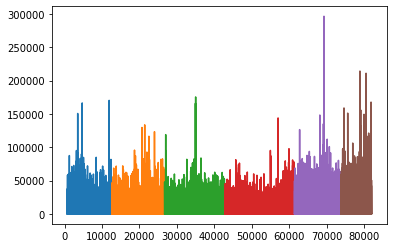

In [273]:
# Plot of delta time during the days
for i in range(len(all_y)):
    dfi.loc[year_ix[i], 'delta_time'].plot()
pylab.show()

# <span style="background:Beige">  Save Dataframes 4 BurningRate & 4 Predict Song (Classification) <span>

In [274]:
dfi.to_json(r"C:\Users\ghoyo\Desktop\TFM 3.0\Project\GeneratedDfs\VisualsData.json")

# <span style='background :khaki' > Make a dataframe with the info of each day <span>

This will make possible to generate predictions models

### First Step - Totals
- Total Nº Streams -> Nº Songs + Nº Podcast
- Total s Streamed -> s Songs Listened + s Podcast Listened

In [275]:
df = dfi

In [276]:
dfi.columns

Index(['platform', 'master_metadata_track_name',
       'master_metadata_album_artist_name', 'master_metadata_album_album_name',
       'spotify_track_uri', 'reason_start', 'reason_end', 'is_song',
       'is_podcast', 'end_streaming', 's_played', 'end_streaming_seconds',
       'start_streaming_seconds', 'start_streaming', 'delta_time', 'year',
       'seasson', 'month', 'month_and_year', 'week', 'week_and_year', 'day',
       'days_to_next_month', 'date', 'hour', 'minute', 'second', 'time',
       'str_time', 'time_in_s', 'week_day', 'df_fractured'],
      dtype='object')

In [277]:
df2 = dfi.copy()
df2 = df2[['is_song', 'is_podcast', 's_played', 'date', 'week_day']]

In [278]:
df2.columns

Index(['is_song', 'is_podcast', 's_played', 'date', 'week_day'], dtype='object')

#### <span style="background:skyblue"> Get Total Nº Streams Each Day -> Nº Songs + Nº Podcast </span>

In [279]:
# Unique Days List
unique_days = df2['date'].unique()
len(unique_days)

# Index each day
day_ix = [df2.loc[df2['date'] == u].index for u in unique_days]

# Total streams each day
day_streams = [len(u) for u in day_ix]
len(day_streams)

# Total Songs each day
day_songs_ix = [df2.loc[(df2['is_song'] == 1) & (df2['date'] == u)].index for u in unique_days]
day_songs = [len(u) for u in day_songs_ix]
len(day_songs)
# Total Podcasts each day
day_podcasts_ix = [df2.loc[(df['is_podcast'] == 1) & (df2['date'] == u)].index for u in unique_days]
day_podcasts = [len(u) for u in day_podcasts_ix]
len(day_podcasts)

2033

#### <span style="background:skyblue"> Get Total s Streamed -> s Songs Listened + s Podcast Listened </span>

In [280]:
# Unique Days List
unique_days = df2['date'].unique()
len(unique_days)

# Index each day
day_ix = [df2.loc[df2['date'] == u].index for u in unique_days]

# Total s stream each day
day_s_streams = [sum(df2.loc[u, 's_played']) for u in day_ix]
len(day_s_streams)

# Total Songs each day
day_s_songs = [sum(df2.loc[(df2['is_song'] == 1) & (df2['date'] == u), 's_played']) for u in unique_days]
len(day_s_songs)
# Total Podcasts each day
day_s_podcasts = [sum(df2.loc[(df2['is_podcast'] == 1) & (df2['date'] == u), 's_played']) for u in unique_days]
len(day_s_podcasts)

2033

#### <span style="background:skyblue"> New Songs Listened each Day </span>

In [281]:
### ***Get Unique Streams Names***
unique_names = df.drop_duplicates(subset = ['master_metadata_track_name'])
unique_names = unique_names[['master_metadata_track_name', 'master_metadata_album_artist_name', 'is_song']]
unique_names

## Now we need to specify for podcast
u_s = unique_names[unique_names['is_song'] == 1]['master_metadata_track_name']
u_p = unique_names[unique_names['is_song'] == 0]['master_metadata_album_artist_name']
u_p = u_p.drop_duplicates()

In [282]:
# Iterate over the list of unique song names saving the index of the first time listened
list_of_index_song = [df.loc[df['master_metadata_track_name'] == song].index[0] for song in u_s]
#len(list_of_index)

# Iterate over the list of unique song names saving the index of the first time listened
list_of_index_podcast = [df.loc[df['master_metadata_album_artist_name'] == podcast].index[0] for podcast in u_p]
#len(list_of_index_podcast)

In [283]:
# Create column for first time listened song (Yes = 1, No = 0)
df2['aux'] = df2.index
df2['firstTime'] = 0
for i in list_of_index_song:
    df2.loc[i, 'firstTime'] = 1
    
for i in list_of_index_podcast:
    df2.loc[i, 'firstTime'] = 1
    
#df.loc[df['master_metadata_track_name'] == 'RAPSTAR']
df2.drop('aux', inplace=True, axis=1)

#df.head()
#df

In [284]:
# Add all new songs in one day
day_n_new_streams = [sum(df2.loc[(df2['firstTime'] == 1) & (df2['date'] == u), 'firstTime']) for u in unique_days]
day_n_new_song = [sum(df2.loc[(df2['firstTime'] == 1) & (df2['is_song'] == 1) & (df2['date'] == u), 'firstTime']) for u in unique_days]
day_n_new_podcast = [sum(df2.loc[(df2['firstTime'] == 1) & (df2['is_podcast'] == 1) & (df2['date'] == u), 'firstTime']) for u in unique_days]

len(day_n_new_podcast)

2033

#### <span style="background:skyblue"> Create Daily Stats DF </span>

In [285]:
%%time
#Total Nº of streams each day =============================================================
df2['day_n_streams'] = np.nan
df2['day_n_songs'] = np.nan
df2['day_n_podcast'] = np.nan

#Total Nº of seconds streamed each day =============================================================
df2['day_s_streams'] = np.nan
df2['day_s_songs'] = np.nan
df2['day_s_podcast'] = np.nan

#Total Nº of seconds NOT streamed each day =============================================================
df2['day_s_no_streams'] = np.nan
df2['day_s_no_songs'] = np.nan
df2['day_s_no_podcast'] = np.nan

#Percentage of seconds streamed each day =============================================================
df2['per_day_stream'] = np.nan
df2['per_day_songs'] = np.nan
df2['per_day_podcast'] = np.nan

#Percentage of seconds streamed by total stream Time =============================================================
df2['per_s_day_podcast'] = np.nan
df2['per_s_day_podcast'] = np.nan

# Count of new elements streamed this day ======================================================
df2['day_new_stream'] = np.nan
df2['day_new_song'] = np.nan
df2['day_new_podcast'] = np.nan

for i in range(len(df2.index)):
    for u, d_s, d_so, d_po, d_s_s, d_s_so, d_s_po, d_n_s, d_n_so, d_n_po in zip(unique_days, day_streams, day_songs, 
                                                                                day_podcasts, day_s_streams, day_s_songs, 
                                                                                day_s_podcasts, day_n_new_streams, 
                                                                                day_n_new_song, day_n_new_podcast):
        if (u == df2.loc[i, 'date']):
            df2.loc[i, 'day_n_streams'] = d_s
            df2.loc[i, 'day_n_songs'] = d_so
            df2.loc[i, 'day_n_podcast'] = d_po
            
            df2.loc[i, 'day_s_streams'] = d_s_s
            df2.loc[i, 'day_s_songs'] = d_s_so
            df2.loc[i, 'day_s_podcast'] = d_s_po
            
            df2.loc[i, 'day_s_no_streams'] = 86400 - d_s_s
            df2.loc[i, 'day_s_no_songs'] = 86400 - d_s_so
            df2.loc[i, 'day_s_no_podcast'] = 86400 - d_s_po
            
            df2.loc[i, 'per_day_stream'] = round(df2.loc[i, 'day_s_streams']/86400, 2)
            df2.loc[i, 'per_day_songs'] = round(df2.loc[i, 'day_s_songs']/86400, 2)
            df2.loc[i, 'per_day_podcast'] = round(df2.loc[i, 'day_s_podcast']/86400, 2)
            
            df2.loc[i, 'per_s_day_songs'] = round(df2.loc[i, 'day_s_songs']/df2.loc[i, 'day_s_streams'], 2)
            df2.loc[i, 'per_s_day_podcast'] = round(df2.loc[i, 'day_s_podcast']/df2.loc[i, 'day_s_streams'], 2)
            
            df2.loc[i, 'day_new_stream'] = d_n_s
            df2.loc[i, 'day_new_song'] = d_n_so
            df2.loc[i, 'day_new_podcast'] = d_n_po

CPU times: total: 25min 19s
Wall time: 27min 6s


In [286]:
df.isna().sum()

platform                             0
master_metadata_track_name           0
master_metadata_album_artist_name    0
master_metadata_album_album_name     0
spotify_track_uri                    0
reason_start                         0
reason_end                           0
is_song                              0
is_podcast                           0
end_streaming                        0
s_played                             0
end_streaming_seconds                0
start_streaming_seconds              0
start_streaming                      0
delta_time                           0
year                                 0
seasson                              0
month                                0
month_and_year                       0
week                                 0
week_and_year                        0
day                                  0
days_to_next_month                   0
date                                 0
hour                                 0
minute                   

In [287]:
df2.head()

,is_song,is_podcast,s_played,date,week_day,firstTime,day_n_streams,day_n_songs,day_n_podcast,day_s_streams,...,day_s_no_songs,day_s_no_podcast,per_day_stream,per_day_songs,per_day_podcast,per_s_day_podcast,day_new_stream,day_new_song,day_new_podcast,per_s_day_songs
0,1,0,18,2017-04-04,1,1,66.0,66.0,0.0,8236.0,...,78164.0,86400.0,0.1,0.1,0.0,0.0,45.0,45.0,0.0,1.0
1,1,0,199,2017-04-04,1,1,66.0,66.0,0.0,8236.0,...,78164.0,86400.0,0.1,0.1,0.0,0.0,45.0,45.0,0.0,1.0
2,1,0,79,2017-04-04,1,1,66.0,66.0,0.0,8236.0,...,78164.0,86400.0,0.1,0.1,0.0,0.0,45.0,45.0,0.0,1.0
3,1,0,96,2017-04-04,1,0,66.0,66.0,0.0,8236.0,...,78164.0,86400.0,0.1,0.1,0.0,0.0,45.0,45.0,0.0,1.0
4,1,0,244,2017-04-04,1,1,66.0,66.0,0.0,8236.0,...,78164.0,86400.0,0.1,0.1,0.0,0.0,45.0,45.0,0.0,1.0


# <span style='background :khaki' > Cleaning the new Dataframe <span>

#### <span style="background:skyblue"> Remove No Relevant Columns </span>

In [288]:
df_easy_day = df2.copy()
df_easy_day.columns

Index(['is_song', 'is_podcast', 's_played', 'date', 'week_day', 'firstTime',
       'day_n_streams', 'day_n_songs', 'day_n_podcast', 'day_s_streams',
       'day_s_songs', 'day_s_podcast', 'day_s_no_streams', 'day_s_no_songs',
       'day_s_no_podcast', 'per_day_stream', 'per_day_songs',
       'per_day_podcast', 'per_s_day_podcast', 'day_new_stream',
       'day_new_song', 'day_new_podcast', 'per_s_day_songs'],
      dtype='object')

In [289]:
# Drop columns only dealing with a certain stream an not the hole day
df_easy_day.drop(['is_song', 'is_podcast', 's_played', 'firstTime'], inplace = True, axis = 1)
df_easy_day.columns

Index(['date', 'week_day', 'day_n_streams', 'day_n_songs', 'day_n_podcast',
       'day_s_streams', 'day_s_songs', 'day_s_podcast', 'day_s_no_streams',
       'day_s_no_songs', 'day_s_no_podcast', 'per_day_stream', 'per_day_songs',
       'per_day_podcast', 'per_s_day_podcast', 'day_new_stream',
       'day_new_song', 'day_new_podcast', 'per_s_day_songs'],
      dtype='object')

#### <span style="background:skyblue"> Remove Fake Predictors </span>

In [290]:
# When we have highly correlated features in the dataset, the values in “S” matrix will be small. 
# So inverse square of “S” matrix (S^-2 in the above equation) will be large which makes the variance of Wₗₛ large. 
# So, it is advised that we keep only one feature in the dataset if two features are highly correlated. 
#I hope this article was helpful. Please leave your queries if any below.

# Remove Fake Detectors

<span style="background:violet"> Order the data </span>

In [291]:
c = df_easy_day.columns
c = c.drop('day_n_streams')
c = list(c)
c.insert(0, 'day_n_streams')

df_easy_day = df_easy_day[c]
df_easy_day.head()

,day_n_streams,date,week_day,day_n_songs,day_n_podcast,day_s_streams,day_s_songs,day_s_podcast,day_s_no_streams,day_s_no_songs,day_s_no_podcast,per_day_stream,per_day_songs,per_day_podcast,per_s_day_podcast,day_new_stream,day_new_song,day_new_podcast,per_s_day_songs
0,66.0,2017-04-04,1,66.0,0.0,8236.0,8236.0,0.0,78164.0,78164.0,86400.0,0.1,0.1,0.0,0.0,45.0,45.0,0.0,1.0
1,66.0,2017-04-04,1,66.0,0.0,8236.0,8236.0,0.0,78164.0,78164.0,86400.0,0.1,0.1,0.0,0.0,45.0,45.0,0.0,1.0
2,66.0,2017-04-04,1,66.0,0.0,8236.0,8236.0,0.0,78164.0,78164.0,86400.0,0.1,0.1,0.0,0.0,45.0,45.0,0.0,1.0
3,66.0,2017-04-04,1,66.0,0.0,8236.0,8236.0,0.0,78164.0,78164.0,86400.0,0.1,0.1,0.0,0.0,45.0,45.0,0.0,1.0
4,66.0,2017-04-04,1,66.0,0.0,8236.0,8236.0,0.0,78164.0,78164.0,86400.0,0.1,0.1,0.0,0.0,45.0,45.0,0.0,1.0


<span style="background:violet"> Investigate </span>

C:\Users\ghoyo\AppData\Local\Temp\ipykernel_14012\1896577387.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



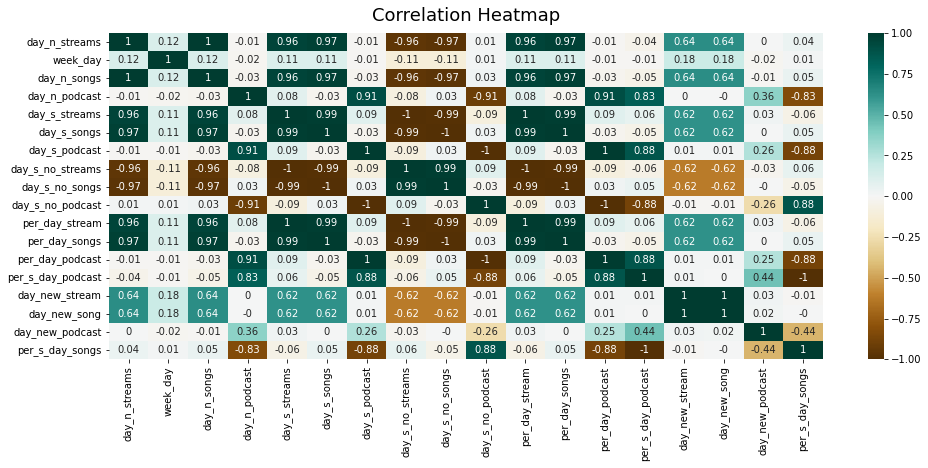

In [292]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(round(df_easy_day.corr(),2), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<span style="background:violet"> Drop </span>

In [293]:
df_easy_day.drop(['day_s_songs', 'day_s_podcast', 'day_s_no_songs', 'day_s_no_streams', 
                  'per_day_songs', 'per_day_songs', 'per_day_stream', 'per_day_podcast', 
                  'per_s_day_podcast', 'day_s_no_podcast', 'per_s_day_songs', 
                  'day_s_streams'], inplace=True, axis=1)

In [294]:
df_easy_day.head()

,day_n_streams,date,week_day,day_n_songs,day_n_podcast,day_new_stream,day_new_song,day_new_podcast
0,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
1,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
2,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
3,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
4,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0


### <span style="background:lightgreen"> Create Last Dataframe </span>

In [295]:
# The DF is going to consist of the necesary features to predict the numbero of streamed / new songs and total streams. With this predicted data we will be able to predict the number of podcast streamed.
df_all_day = df_easy_day.copy()
df_all_day.head()

,day_n_streams,date,week_day,day_n_songs,day_n_podcast,day_new_stream,day_new_song,day_new_podcast
0,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
1,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
2,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
3,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
4,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0


<span style="background:violet"> Check </span>

C:\Users\ghoyo\AppData\Local\Temp\ipykernel_14012\743480493.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



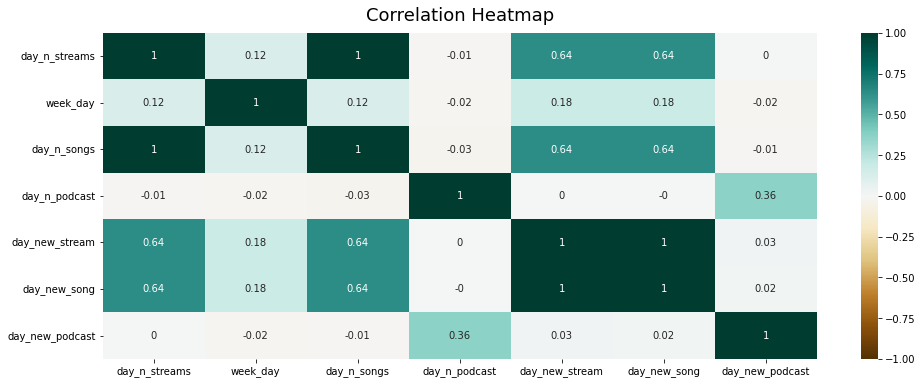

In [296]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(round(df_all_day.corr(),2), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

#### <span style="background:skyblue"> Missing Values </span>

<span style="background:violet"> seach missing values </span>

In [297]:
df_all_day.head(3)

,day_n_streams,date,week_day,day_n_songs,day_n_podcast,day_new_stream,day_new_song,day_new_podcast
0,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
1,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
2,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0


In [298]:
df_all_day = df_all_day.drop_duplicates()
df_all_day

,day_n_streams,date,week_day,day_n_songs,day_n_podcast,day_new_stream,day_new_song,day_new_podcast
0,66.0,2017-04-04,1,66.0,0.0,45.0,45.0,0.0
66,123.0,2017-04-05,2,123.0,0.0,70.0,70.0,0.0
189,63.0,2017-04-06,3,63.0,0.0,14.0,14.0,0.0
252,45.0,2017-04-07,4,45.0,0.0,17.0,17.0,0.0
297,56.0,2017-04-08,5,56.0,0.0,6.0,6.0,0.0
...,...,...,...,...,...,...,...,...
81947,9.0,2022-11-20,6,9.0,0.0,0.0,0.0,0.0
81956,7.0,2022-11-21,0,7.0,0.0,1.0,1.0,0.0
81963,25.0,2022-11-22,1,25.0,0.0,3.0,3.0,0.0
81988,21.0,2022-11-23,2,21.0,0.0,1.0,1.0,0.0


In [299]:
df_all_day.set_index('date', inplace=True)

In [300]:
df_all_day.head(2)

,day_n_streams,week_day,day_n_songs,day_n_podcast,day_new_stream,day_new_song,day_new_podcast
date,,,,,,,
2017-04-04,66.0,1,66.0,0.0,45.0,45.0,0.0
2017-04-05,123.0,2,123.0,0.0,70.0,70.0,0.0


In [301]:
start = df_all_day.index[0]
end = df_all_day.index[-1]
diff = end-start

date_list = [start + timedelta(days=x) for x in range(diff.days+1)]
print('Generated len = ', len(date_list), '\t|', '\t Gen_Start: ', date_list[0], '\t Gen_End: ', date_list[-1])
print('Original len =  ', len(df.index), '\t|', '\t Org_Start: ', start, '\t Org_End: ', end)

if(date_list[0] != start and date_list[-1] != end):
    print('ERROR')
elif(len(df_all_day.index) != len(date_list)):
    print('Missing Values Existing... Reindexing')
    df_all_day = df_all_day.reindex(date_list)
    
#a = pd.date_range(start=df_all_day.index[0], end=df_all_day.index[-1])
#len(a)

Generated len =  2061 	| 	 Gen_Start:  2017-04-04 	 Gen_End:  2022-11-24
Original len =   82028 	| 	 Org_Start:  2017-04-04 	 Org_End:  2022-11-24
Missing Values Existing... Reindexing


In [302]:
end

datetime.date(2022, 11, 24)

In [303]:
df_all_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 2017-04-04 to 2022-11-24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day_n_streams    2033 non-null   float64
 1   week_day         2033 non-null   float64
 2   day_n_songs      2033 non-null   float64
 3   day_n_podcast    2033 non-null   float64
 4   day_new_stream   2033 non-null   float64
 5   day_new_song     2033 non-null   float64
 6   day_new_podcast  2033 non-null   float64
dtypes: float64(7)
memory usage: 128.8+ KB


In [304]:
df_all_day.isna().sum()[0]

28

In [305]:
naix = df_all_day[df_all_day['day_n_streams'].isna()].index
df_all_day[df_all_day['day_n_streams'].isna()]

,day_n_streams,week_day,day_n_songs,day_n_podcast,day_new_stream,day_new_song,day_new_podcast
date,,,,,,,
2017-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
## Check variability of target variable to know if interpolation is an option
df_all_day.var()

day_n_streams      795.524329
week_day             3.988530
day_n_songs        795.691689
day_n_podcast        0.450688
day_new_stream     102.610388
day_new_song       102.485588
day_new_podcast      0.021374
dtype: float64

<span style="background:violet"> Complete missing Data </span>

<span style='background :yellow' > Should we interpolate ?? </span>
- Spline Vs Time
 - Spline: Estimates values that minimize overall curvature, thus obtaining a smooth surface passing through the input points.
 - Time: Estimates missing values by focusing more on nearby points than far away points.
 
 
- Forward & Backward
- Statistical

<span style='background :yellow' > No, We need to put ZEROS Everywhere Except in dayweek </span>

df_easy_day = df_easy_day.interpolate(option ='spline')

df_easy_day['day_n_streams'] = df_easy_day['day_n_streams'].interpolate(option ='spline')

In [307]:
df_all_day.head(2)

,day_n_streams,week_day,day_n_songs,day_n_podcast,day_new_stream,day_new_song,day_new_podcast
date,,,,,,,
2017-04-04,66.0,1.0,66.0,0.0,45.0,45.0,0.0
2017-04-05,123.0,2.0,123.0,0.0,70.0,70.0,0.0


In [308]:
print('Number of missing values =', len(naix), '==', round((len(naix)/len(df_all_day.index))*100,2), '%\n')
for i in naix:
    print(df_all_day.loc[i-timedelta(days=1):i+timedelta(days=1)], '\n\n')
    print(' -------------------------------------------------------------- ', '\n\n')

Number of missing values = 28 == 1.36 %

            day_n_streams  week_day  day_n_songs  day_n_podcast  \
date                                                              
2017-04-11           18.0       1.0         18.0            0.0   
2017-04-12            NaN       NaN          NaN            NaN   
2017-04-13            NaN       NaN          NaN            NaN   

            day_new_stream  day_new_song  day_new_podcast  
date                                                       
2017-04-11             5.0           5.0              0.0  
2017-04-12             NaN           NaN              NaN  
2017-04-13             NaN           NaN              NaN   


 --------------------------------------------------------------  


            day_n_streams  week_day  day_n_songs  day_n_podcast  \
date                                                              
2017-04-12            NaN       NaN          NaN            NaN   
2017-04-13            NaN       NaN          NaN   

2022-10-19             0.0           0.0              0.0   


 --------------------------------------------------------------  


            day_n_streams  week_day  day_n_songs  day_n_podcast  \
date                                                              
2022-11-13           12.0       6.0         12.0            0.0   
2022-11-14            NaN       NaN          NaN            NaN   
2022-11-15            2.0       1.0          2.0            0.0   

            day_new_stream  day_new_song  day_new_podcast  
date                                                       
2022-11-13             1.0           1.0              0.0  
2022-11-14             NaN           NaN              NaN  
2022-11-15             0.0           0.0              0.0   


 --------------------------------------------------------------  




In [309]:
for i in naix:
    for j in df_all_day.columns:
        if(j == 'week_day'):
            if(df_all_day.loc[i-timedelta(days=1), j] != 6.0):
                df_all_day.loc[i, j] = df_all_day.loc[i-timedelta(days=1), j]+1
            else:
                df_all_day.loc[i, j] = 0
        else:    
            df_all_day.loc[i, j] = 0

In [310]:
for i in naix:
    print(df_all_day.loc[i-timedelta(days=1):i+timedelta(days=1)], '\n\n')
    print(' -------------------------------------------------------------- ', '\n\n')

            day_n_streams  week_day  day_n_songs  day_n_podcast  \
date                                                              
2017-04-11           18.0       1.0         18.0            0.0   
2017-04-12            0.0       2.0          0.0            0.0   
2017-04-13            0.0       3.0          0.0            0.0   

            day_new_stream  day_new_song  day_new_podcast  
date                                                       
2017-04-11             5.0           5.0              0.0  
2017-04-12             0.0           0.0              0.0  
2017-04-13             0.0           0.0              0.0   


 --------------------------------------------------------------  


            day_n_streams  week_day  day_n_songs  day_n_podcast  \
date                                                              
2017-04-12            0.0       2.0          0.0            0.0   
2017-04-13            0.0       3.0          0.0            0.0   
2017-04-14            0.0

2019-07-22             9.0           9.0              0.0   


 --------------------------------------------------------------  


            day_n_streams  week_day  day_n_songs  day_n_podcast  \
date                                                              
2021-07-24           57.0       5.0         57.0            0.0   
2021-07-25            0.0       6.0          0.0            0.0   
2021-07-26           20.0       0.0         20.0            0.0   

            day_new_stream  day_new_song  day_new_podcast  
date                                                       
2021-07-24            13.0          13.0              0.0  
2021-07-25             0.0           0.0              0.0  
2021-07-26             1.0           1.0              0.0   


 --------------------------------------------------------------  


            day_n_streams  week_day  day_n_songs  day_n_podcast  \
date                                                              
2021-08-20            9.0   

In [311]:
df_all_day.head()

,day_n_streams,week_day,day_n_songs,day_n_podcast,day_new_stream,day_new_song,day_new_podcast
date,,,,,,,
2017-04-04,66.0,1.0,66.0,0.0,45.0,45.0,0.0
2017-04-05,123.0,2.0,123.0,0.0,70.0,70.0,0.0
2017-04-06,63.0,3.0,63.0,0.0,14.0,14.0,0.0
2017-04-07,45.0,4.0,45.0,0.0,17.0,17.0,0.0
2017-04-08,56.0,5.0,56.0,0.0,6.0,6.0,0.0


In [312]:
df_all_day.isna().sum()[0]

0

In [313]:
df_all_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 2017-04-04 to 2022-11-24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day_n_streams    2061 non-null   float64
 1   week_day         2061 non-null   float64
 2   day_n_songs      2061 non-null   float64
 3   day_n_podcast    2061 non-null   float64
 4   day_new_stream   2061 non-null   float64
 5   day_new_song     2061 non-null   float64
 6   day_new_podcast  2061 non-null   float64
dtypes: float64(7)
memory usage: 193.4+ KB


### <span style='background :lightgreen' > Save Data <span>

In [314]:
# DF 1 - Original - Predict Nº Streams
df_all_day.to_json(r"C:\Users\ghoyo\Desktop\TFM 3.0\Project\GeneratedDfs\by_day.json")

In [315]:
sum(df_easy_day['day_new_stream'])

929926.0

In [316]:
sum(df_easy_day['day_n_streams'])

4926192.0

# <span style='background :red' > Generate By 24H Dataframe <span>

# <span style='background :red' > Generate By 24H Dataframe <span>

# <span style='background :red' > Generate By 24H Dataframe <span>

# <span style='background :khaki' > Treating Special Data <span>

### <span style="background:lightgreen"> First Discovered Songs</span>

All songs and podcast in the first months are new, but this maight not be true, because you surely know most of them, although it is the first time you are listening to them at this platform 

In [317]:
df_all_day_2 = df_all_day.copy()
ix_l = list(df_all_day_2.index[:30])

In [318]:
for i, j in zip(df_all_day_2.index, range(len(df_all_day_2.index))):
    if j <= 60:
        df_all_day_2.loc[i, 'day_new_stream'] = 0
        df_all_day_2.loc[i, 'day_new_song'] = 0
        df_all_day_2.loc[i, 'day_new_podcast'] = 0

In [319]:
df_all_day_2

,day_n_streams,week_day,day_n_songs,day_n_podcast,day_new_stream,day_new_song,day_new_podcast
date,,,,,,,
2017-04-04,66.0,1.0,66.0,0.0,0.0,0.0,0.0
2017-04-05,123.0,2.0,123.0,0.0,0.0,0.0,0.0
2017-04-06,63.0,3.0,63.0,0.0,0.0,0.0,0.0
2017-04-07,45.0,4.0,45.0,0.0,0.0,0.0,0.0
2017-04-08,56.0,5.0,56.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-20,9.0,6.0,9.0,0.0,0.0,0.0,0.0
2022-11-21,7.0,0.0,7.0,0.0,1.0,1.0,0.0
2022-11-22,25.0,1.0,25.0,0.0,3.0,3.0,0.0


In [320]:
df_all_day_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 2017-04-04 to 2022-11-24
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day_n_streams    2061 non-null   float64
 1   week_day         2061 non-null   float64
 2   day_n_songs      2061 non-null   float64
 3   day_n_podcast    2061 non-null   float64
 4   day_new_stream   2061 non-null   float64
 5   day_new_song     2061 non-null   float64
 6   day_new_podcast  2061 non-null   float64
dtypes: float64(7)
memory usage: 193.4+ KB


### <span style='background :lightgreen' > Save Data - 2<span>

In [321]:
# DF 2 - Testing Stationary Transformations - Predict Nº Streams
df_all_day_2.to_json(r"C:\Users\ghoyo\Desktop\TFM 3.0\Project\GeneratedDfs\by_day_2.json")

In [322]:
sum(df_all_day_2['day_new_stream'])

13428.0

In [323]:
sum(df_all_day_2['day_n_streams'])

82028.0

# <span style='background :khaki' > Generate New Dataframe For Rest Spikes <span>

### <span style="background:lightgreen"> Rest Types </span>

- <<< 10 = Distracción - Mo se Cuenta.
- de 10 a 20 Mins = Descanso Corto
- de 20 mins a 60 mins = Descanso
- de 60 a 120 = Descanso Largo
- de 120 a 240 = Pausa
- de 240 a 480 = Dormido
- de 480 a >>> = Suspendido 

In [324]:
dfi['delta_time'].head()

0    490066.0
1      2041.0
2        32.0
3         1.0
4         3.0
Name: delta_time, dtype: float64

<span style="background:yellow"> Search more bibliography</span>

#### First we need to place the different thresholds for each rest class so when it is detected we save in a new dataset the most significant data:
 - index: Give access to all temporal features
 - listened time until then // Number of streamings done until then
 - Tipe of rest // Delta time = Seconds rested
 

In [325]:
df_aux = dfi.copy()

In [326]:
df_aux[:20]['delta_time']
df_aux.loc[0, ['delta_time']] = 0

df_aux2 = df_aux
df_aux2['delta_time']

0           0.0
1        2041.0
2          32.0
3           1.0
4           3.0
          ...  
82023       0.0
82024     110.0
82025      11.0
82026      15.0
82027       0.0
Name: delta_time, Length: 82028, dtype: float64

In [327]:
# Create new dataframe
rest_df = pd.DataFrame(columns = ['end_streaming', 'delta_time', 'rest_type', 'total_time_listened', 'n_streams_listened'])

In [328]:
df_aux2.loc[1:3, 's_played']

1    199
2     79
3     96
Name: s_played, dtype: int64

In [329]:
last_time = 0

for i in df_aux2.index:
    if df_aux2.loc[i, 'delta_time'] > 600 and df_aux2.loc[i, 'delta_time'] <= 1200:
        tt_listened = sum(df_aux2.loc[last_time:i, 's_played'])
        ns_listened = len(df_aux2.loc[last_time:i, 's_played'])
        last_time = i+1 
        new_row = pd.Series({'end_streaming': df_aux2.loc[i, 'end_streaming'], 'delta_time': df_aux2.loc[i, 'delta_time'], 
                             'rest_type': 0, 'total_time_listened': tt_listened, 'n_streams_listened': ns_listened})
        rest_df = pd.concat([rest_df, new_row.to_frame().T])
                
    elif df_aux2.loc[i, 'delta_time'] > 1200 and df_aux2.loc[i, 'delta_time'] <= 3600:
        tt_listened = sum(df_aux2.loc[last_time:i, 's_played'])
        ns_listened = len(df_aux2.loc[last_time:i, 's_played'])
        last_time = i+1 
        new_row = pd.Series({'end_streaming': df_aux2.loc[i, 'end_streaming'], 'delta_time': df_aux2.loc[i, 'delta_time'], 
                             'rest_type': 1, 'total_time_listened': tt_listened, 'n_streams_listened': ns_listened})
        rest_df = pd.concat([rest_df, new_row.to_frame().T])
        #rest_df.append([df_aux2.loc[i, 'end_streaming'], df_aux2.loc[i, 'delta_time'], 1, total_time_listened, n_streams_listened])
        
    elif df_aux2.loc[i, 'delta_time'] > 3600 and df_aux2.loc[i, 'delta_time'] <= 14400:
        tt_listened = sum(df_aux2.loc[last_time:i, 's_played'])
        ns_listened = len(df_aux2.loc[last_time:i, 's_played'])
        last_time = i+1 
        new_row = pd.Series({'end_streaming': df_aux2.loc[i, 'end_streaming'], 'delta_time': df_aux2.loc[i, 'delta_time'], 
                             'rest_type': 2, 'total_time_listened': tt_listened, 'n_streams_listened': ns_listened})
        rest_df = pd.concat([rest_df, new_row.to_frame().T])
        #rest_df.append([df_aux2.loc[i, 'end_streaming'], df_aux2.loc[i, 'delta_time'], 2, total_time_listened, n_streams_listened])
        
    elif df_aux2.loc[i, 'delta_time'] > 14400 and df_aux2.loc[i, 'delta_time'] <= 43200:
        tt_listened = sum(df_aux2.loc[last_time:i, 's_played'])
        ns_listened = len(df_aux2.loc[last_time:i, 's_played'])
        last_time = i+1 
        new_row = pd.Series({'end_streaming': df_aux2.loc[i, 'end_streaming'], 'delta_time': df_aux2.loc[i, 'delta_time'], 
                             'rest_type': 3, 'total_time_listened': tt_listened, 'n_streams_listened': ns_listened})
        rest_df = pd.concat([rest_df, new_row.to_frame().T])
        #rest_df.append([df_aux2.loc[i, 'end_streaming'], df_aux2.loc[i, 'delta_time'], 3, total_time_listened, n_streams_listened])
        
    elif df_aux2.loc[i, 'delta_time'] > 43200 and df_aux2.loc[i, 'delta_time'] <= 86400:
        tt_listened = sum(df_aux2.loc[last_time:i, 's_played'])
        ns_listened = len(df_aux2.loc[last_time:i, 's_played'])
        last_time = i+1
        new_row = pd.Series({'end_streaming': df_aux2.loc[i, 'end_streaming'], 'delta_time': df_aux2.loc[i, 'delta_time'], 
                             'rest_type': 4, 'total_time_listened': tt_listened, 'n_streams_listened': ns_listened})
        rest_df = pd.concat([rest_df, new_row.to_frame().T])
        #rest_df.append([df_aux2.loc[i, 'end_streaming'], df_aux2.loc[i, 'delta_time'], 4, total_time_listened, n_streams_listened])
        
    elif df_aux2.loc[i, 'delta_time'] > 86400 and df_aux2.loc[i, 'delta_time'] <= 259200:
        tt_listened = sum(df_aux2.loc[last_time:i, 's_played'])
        ns_listened = len(df_aux2.loc[last_time:i, 's_played'])
        last_time = i+1 
        new_row = pd.Series({'end_streaming': df_aux2.loc[i, 'end_streaming'], 'delta_time': df_aux2.loc[i, 'delta_time'], 
                             'rest_type': 5, 'total_time_listened': tt_listened, 'n_streams_listened': ns_listened})
        rest_df = pd.concat([rest_df, new_row.to_frame().T])
        #rest_df.append([df_aux2.loc[i, 'end_streaming'], df_aux2.loc[i, 'delta_time'], 5, total_time_listened, n_streams_listened])
        
    elif df_aux2.loc[i, 'delta_time'] > 259200:
        tt_listened = sum(df_aux2.loc[last_time:i, 's_played'])
        ns_listened = len(df_aux2.loc[last_time:i, 's_played'])
        last_time = i+1 
        new_row = pd.Series({'end_streaming': df_aux2.loc[i, 'end_streaming'], 'delta_time': df_aux2.loc[i, 'delta_time'], 
                             'rest_type': 6, 'total_time_listened': tt_listened, 'n_streams_listened': ns_listened})
        rest_df = pd.concat([rest_df, new_row.to_frame().T])
        #rest_df.append([df_aux2.loc[i, 'end_streaming'], df_aux2.loc[i, 'delta_time'], 5, total_time_listened, n_streams_listened])

In [330]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11504 entries, 0 to 0
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   end_streaming        11504 non-null  datetime64[ns]
 1   delta_time           11504 non-null  object        
 2   rest_type            11504 non-null  object        
 3   total_time_listened  11504 non-null  object        
 4   n_streams_listened   11504 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 539.2+ KB


In [331]:
rest_df.reset_index(inplace=True, drop=True)
rest_df.set_index('end_streaming', inplace=True)
rest_df

,delta_time,rest_type,total_time_listened,n_streams_listened
end_streaming,,,,
2017-04-04 14:06:56,2041.0,1,217,2
2017-04-04 14:55:10,1530.0,1,1262,9
2017-04-04 16:28:27,4649.0,2,947,7
2017-04-04 17:28:27,872.0,0,2681,18
2017-04-04 18:40:34,1927.0,1,2310,24
...,...,...,...,...
2022-11-23 06:53:53,42452.0,3,3121,13
2022-11-23 18:14:12,37968.0,3,2748,14
2022-11-23 21:31:19,10730.0,2,1069,5


### <span style="background:lightgreen"> Save - 3 </span>

In [332]:
# Rest Types DF
rest_df.to_json(r"C:\Users\ghoyo\Desktop\TFM 3.0\Project\GeneratedDfs\rests.json")

In [333]:
pylab.show()